In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta

# Fetch the data
data = yf.download(tickers = '^GSPC', start = '2012-03-11', end = '2022-07-10')

# Calculate SMA and RSI as features
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['RSI_14'] = ta.rsi(data['Close'], length=14)

# Create labels: 1 if next day's close is higher than today's close, else 0
data['Next_Close'] = data['Close'].shift(-1) # Next day's close
data['Target'] = (data['Next_Close'] > data['Close']).astype(int)

# Drop rows with NaN values because of the SMA and RSI calculations
data_clean = data.dropna()

# Show the prepared dataset
data_clean.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_50,RSI_14,Next_Close,Target
Date,,,,,,,,,,
2012-05-21,1295.729980,1316.390015,1295.729980,1315.989990,1315.989990,3786750000,1380.579592,34.053246,1316.630005,1
2012-05-22,1316.089966,1328.489990,1310.040039,1316.630005,1316.630005,4123680000,1379.490393,34.379571,1318.859985,1
2012-05-23,1316.020020,1320.709961,1296.530029,1318.859985,1318.859985,4108330000,1377.948594,35.575764,1320.680054,1
2012-05-24,1318.719971,1324.140015,1310.500000,1320.680054,1320.680054,3937670000,1376.476594,36.591731,1317.819946,0
2012-05-25,1320.810059,1324.199951,1314.229980,1317.819946,1317.819946,2872660000,1374.780994,35.640569,1332.420044,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Simulating the dataset
np.random.seed(0)  # For reproducibility
dates = pd.date_range('2012-03-11', periods=2500)
close_prices = np.random.normal(loc=100, scale=10, size=2500)
sma_50 = np.random.normal(loc=100, scale=5, size=2500)
rsi_14 = np.random.uniform(30, 70, size=2500)
targets = np.random.randint(0, 2, size=2500)

# Creating DataFrame
data_simulated = pd.DataFrame({
    'Date': dates,
    'Close': close_prices,
    'SMA_50': sma_50,
    'RSI_14': rsi_14,
    'Target': targets
})
data_simulated.set_index('Date', inplace=True)

# Splitting the dataset
X = data_simulated[['Close', 'SMA_50', 'RSI_14']]
y = data_simulated['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)

accuracy


0.474

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Assuming X and y are already defined
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)


# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = to_categorical(y_seq)

# Split data into training and test sets
X_train_seq, X_test_seq = X_seq[:int(len(X_seq)*0.8)], X_seq[int(len(X_seq)*0.8):]
y_train_seq, y_test_seq = y_seq[:int(len(y_seq)*0.8)], y_seq[int(len(y_seq)*0.8):]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X.shape[1])),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Accuracy: {test_acc}")


C:\Users\smmcd\AppData\Local\Temp\ipykernel_18248\2732342671.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])



Epoch 1/10
56/56 [==============================] - 5s 26ms/step - loss: 0.6937 - accuracy: 0.5022 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/10
56/56 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5022 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
56/56 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/10
56/56 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4967 - val_loss: 0.6934 - val_accuracy: 0.4750
Epoch 5/10
56/56 [==============================] - 1s 13ms/step - loss: 0.6936 - accuracy: 0.4972 - val_loss: 0.6935 - val_accuracy: 0.4700
Epoch 6/10
56/56 [==============================] - 1s 20ms/step - loss: 0.6931 - accuracy: 0.4933 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/10
56/56 [==============================] - 1s 19ms/step - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 8/10
56/5

In [16]:
import matplotlib.pyplot as plt
epochs = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'train_acc' is not defined

<Figure size 1000x600 with 0 Axes>

In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1432.819946,1443.900024,1432.819946,1432.839966,46.542416,1443.599870,1405.823514,1382.254066,-4.250000,0,1428.589966
1,1432.839966,1438.430054,1425.530029,1428.589966,44.420706,1442.170355,1406.274334,1382.867786,11.380005,1,1440.130005
2,1428.750000,1441.310059,1427.239990,1440.130005,50.928689,1441.976036,1406.944744,1383.626226,14.609985,1,1454.920044
3,1440.310059,1455.510010,1440.310059,1454.920044,57.725930,1443.208799,1407.894750,1384.570515,6.690063,1,1460.910034
4,1454.219971,1462.199951,1453.349976,1460.910034,60.122828,1444.894631,1408.944557,1385.581635,-3.599976,0,1457.339966
5,1460.939941,1464.020020,1452.630005,1457.339966,58.022041,1446.079901,1409.902882,1386.532076,-24.150024,0,1433.189941
6,1457.339966,1457.339966,1429.849976,1433.189941,46.297315,1444.852286,1410.364012,1387.150061,0.609985,1,1433.819946
7,1433.209961,1435.459961,1422.060059,1433.819946,46.598928,1443.801587,1410.828486,1387.768205,-20.630005,0,1413.109985
8,1433.739990,1433.739990,1407.560059,1413.109985,38.903386,1440.878577,1410.873664,1388.103858,-4.449951,0,1408.750000
9,1413.199951,1420.040039,1407.099976,1408.750000,37.506259,1437.818713,1410.831612,1388.377317,3.229980,1,1412.969971


In [4]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0230242  0.02408329 0.02603376 ... 0.50118487 0.         0.02185739]
 [0.02303    0.02250146 0.02391256 ... 0.55485007 1.         0.0252089 ]
 [0.0218449  0.02333431 0.02441012 ... 0.56594013 1.         0.0295043 ]
 ...
 [0.70679347 0.71473969 0.69797102 ... 0.56075597 1.         0.72366646]
 [0.71820122 0.72593691 0.71755675 ... 0.66606033 1.         0.74037752]
 [0.72598707 0.73742331 0.73195432 ... 0.55395692 1.         0.73943647]]


In [5]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[2.30241995e-02 2.40832928e-02 2.60337619e-02 ... 1.49511302e-02
   3.28147847e-04 0.00000000e+00]
  [2.30300003e-02 2.25014621e-02 2.39125589e-02 ... 1.45214298e-02
   4.70150579e-04 1.97429272e-04]
  [2.18448979e-02 2.33343148e-02 2.44101194e-02 ... 1.44630191e-02
   6.81320841e-04 4.41413702e-04]
  ...
  [9.97640088e-03 8.85772233e-03 1.25236894e-02 ... 0.00000000e+00
   1.10172426e-06 2.17642941e-03]
  [1.09152156e-02 1.40370264e-02 1.38738300e-02 ... 4.37694152e-04
   2.83265559e-05 2.26220157e-03]
  [1.61656383e-02 1.40341317e-02 1.58088385e-02 ... 7.51828082e-04
   3.71735020e-05 2.33465177e-03]]

 [[2.30300003e-02 2.25014621e-02 2.39125589e-02 ... 1.45214298e-02
   4.70150579e-04 1.97429272e-04]
  [2.18448979e-02 2.33343148e-02 2.44101194e-02 ... 1.44630191e-02
   6.81320841e-04 4.41413702e-04]
  [2.51945232e-02 2.74407204e-02 2.82132171e-02 ... 1.48335774e-02
   9.80560424e-04 7.45184353e-04]
  ...
  [1.09152156e-02 1.40370264e-02 1.38738300e-02 ... 4.37694152e-04
   2.

In [7]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [6]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.55409481]
 [0.5363436 ]
 [0.51656718]
 ...
 [0.53758002]
 [0.57273876]
 [0.55148492]]


In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)



Epoch 1/30

117/117 [==============================] - 13s 48ms/step - loss: 0.0145 - val_loss: 0.0219
Epoch 2/30
117/117 [==============================] - 3s 29ms/step - loss: 0.0041 - val_loss: 0.0198
Epoch 3/30
117/117 [==============================] - 2s 20ms/step - loss: 0.0035 - val_loss: 0.0215
Epoch 4/30
117/117 [==============================] - 2s 18ms/step - loss: 0.0034 - val_loss: 0.0217
Epoch 5/30
117/117 [==============================] - 2s 19ms/step - loss: 0.0035 - val_loss: 0.0204
Epoch 6/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0034 - val_loss: 0.0204
Epoch 7/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0033 - val_loss: 0.0198
Epoch 8/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0033 - val_loss: 0.0198
Epoch 9/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0036 - val_loss: 0.0198
Epoch 10/30
117/117 [==============================] - 2s 20ms/step - loss: 0.0033 - va

In [8]:

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, Input
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

# Seed setting for reproducibility (optional)
np.random.seed(10)

# Model architecture
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
x = LSTM(50, name='lstm_layer')(lstm_input)  # Reduced number of neurons
x = Dropout(0.2, name='dropout')(x)  # Dropout for regularization
x = Dense(1, name='dense_layer')(x)
output = Activation('sigmoid', name='output')(x)  # Using 'sigmoid' for binary classification

model = Model(inputs=lstm_input, outputs=output)

# Optimizer with adjusted learning rate
adam = Adam(learning_rate=0.001)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Model fitting
model.fit(x=X_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)


Epoch 1/50

55/55 [==============================] - 7s 32ms/step - loss: 0.6930 - accuracy: 0.0000e+00 - val_loss: 0.6925 - val_accuracy: 0.0052
Epoch 2/50
55/55 [==============================] - 1s 14ms/step - loss: 0.6928 - accuracy: 0.0000e+00 - val_loss: 0.6925 - val_accuracy: 0.0052
Epoch 3/50
55/55 [==============================] - 1s 24ms/step - loss: 0.6927 - accuracy: 0.0000e+00 - val_loss: 0.6925 - val_accuracy: 0.0052
Epoch 4/50
55/55 [==============================] - 1s 16ms/step - loss: 0.6927 - accuracy: 0.0000e+00 - val_loss: 0.6926 - val_accuracy: 0.0052
Epoch 5/50
55/55 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.0000e+00 - val_loss: 0.6926 - val_accuracy: 0.0052
Epoch 6/50
55/55 [==============================] - 2s 32ms/step - loss: 0.6926 - accuracy: 0.0000e+00 - val_loss: 0.6924 - val_accuracy: 0.0052
Epoch 7/50
55/55 [==============================] - 1s 13ms/step - loss: 0.6926 - accuracy: 0.0000e+00 - val_loss: 0.6925 - val_a

In [9]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 2s 7ms/step
[0.5114742] [0.60501307]
[0.5111475] [0.55433497]
[0.51082426] [0.53098718]
[0.5105894] [0.38993982]
[0.51039153] [0.60123675]
[0.51045007] [0.51742513]
[0.5103351] [0.53016402]
[0.51027507] [0.51965655]
[0.51027] [0.52518481]
[0.51021135] [0.45514229]


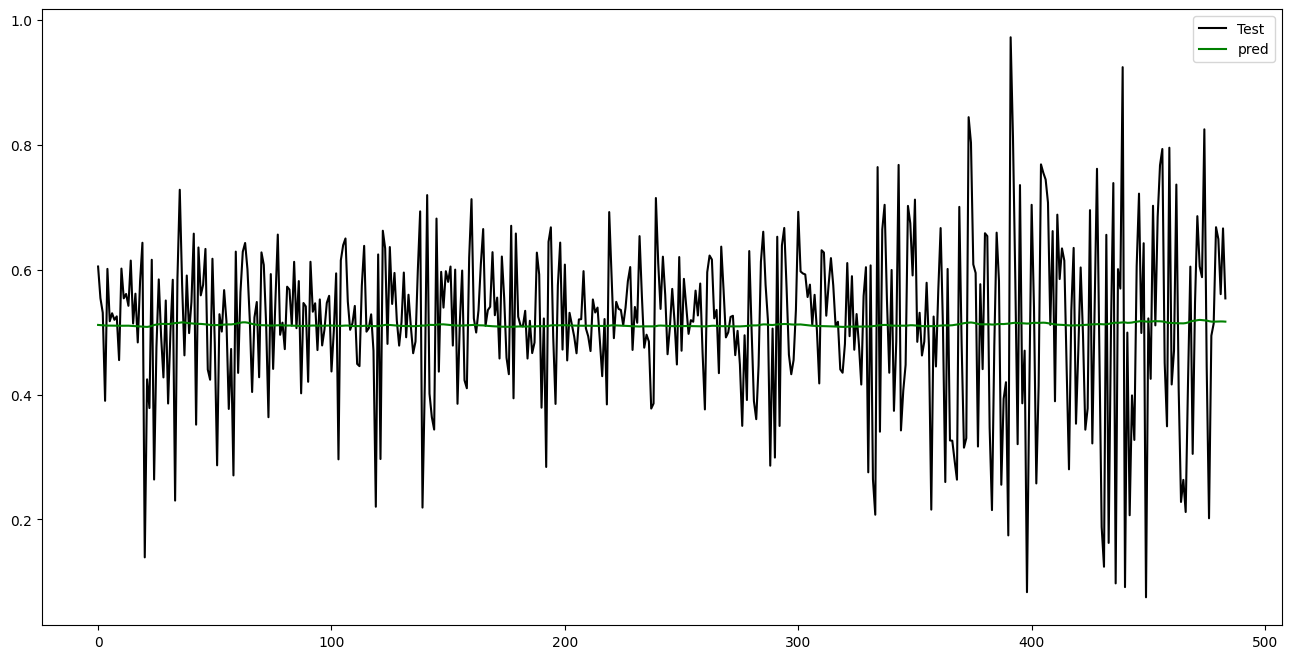

In [10]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()